In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import warnings
warnings.filterwarnings('ignore')


https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners/notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8")) # Changed the directory to the current directory
# Any results you write to the current directory are saved as output.

drive
sample_data



In [4]:
os.chdir("/content/drive/MyDrive/Learning/Deep Learning")
!ls

X.npy  Y.npy


In [5]:
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8")) # Changed the directory to the current directory
# Any results will be written to the current directory are saved as output.

X.npy
Y.npy



In [6]:
x_l = np.load('/content/drive/MyDrive/Learning/Deep Learning/X.npy/X.npy')

In [7]:
Y_l = np.load('/content/drive/MyDrive/Learning/Deep Learning/Y.npy')

(-0.5, 63.5, 63.5, -0.5)

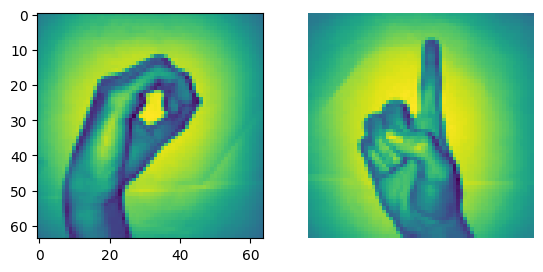

In [8]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
# plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

F\rom 0 to 204 is zero sign and from 205 to 410 is one sign.
In order to create image array, concatenate zero sign and one sign arrays.
Creation label array 0 for zero sign images and 1 for one sign images.

In [9]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign

Create array with 205  z signs for zero and with 205 signs for ones.

In [10]:
z = np.zeros(205)

In [11]:
o = np.ones(205)

In [12]:
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)

In [13]:
x_l.shape

(2062, 64, 64)

In [14]:
X.shape

(410, 64, 64)

In [15]:
Y.shape

(410, 1)

The shape of the X is (410, 64, 64)
410 means that are 410 images (zero and one signs)
64 means that image size is 64x64 (64x64 pixels)
The shape of the Y is (410,1)
410 means that we have 410 labels (0 and 1)
Split X and Y into train and test sets.
test_size = percentage of test size. test = 15% and train = 75%
random_state = use same seed while randomizing. It means that if call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [16]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

3 dimensional input array (X) have to be flatten to (2D) in order to use as input in deep learning model.
Label array (Y) is already flatten(2D).
Flattening X array(images array).

In [17]:
X_train.shape

(348, 64, 64)

In [18]:
X_test.shape

(62, 64, 64)

In [19]:
number_of_train

348

In [20]:
number_of_test

62

In [21]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


As you can see, we have 348 images and each image has 4096 pixels in image train array.
Also, we have 62 images and each image has 4096 pixels in image test array.
Then lets take transpose.

In [22]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Parameters are weight and bias.
Weights: coefficients of each pixels
Bias: intercept
z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
In an other saying => z = b + px1w1 + px2w2 + ... + px4096*w4096
y_head = sigmoid(z)
Sigmoid function makes z between zero and one so that is probability.
Sigmoid function is because it gives probabilistic result.
It is derivative  gradient descent algorithm can be usesd.
Example:z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.


Initializing parameters
Input are images that have 4096 pixels(each image in x_train).
Each pixels have own weights.
The first step is multiplying each pixels with their own weights.
For this time initial weights are 0.01. From computation graph of logistic regression weight array shape is (4096,1). Initial bias is 0.


In [23]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# Initialize parameters
# Dimension is 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [ ]:
#w,b = initialize_weights_and_bias(4096)

Forward Propagation
The all steps from pixels to cost is called forward propagation
z = (w.T)x + b => in this equation: x - is pixel array,  w (weights) and b (bias) so the rest is calculation. (T is transpose)
Then z is put into sigmoid function that returns y_head(probability).
Then loss(error) function is calculated. Cost function is summation of all loss(error).
Create sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

In [24]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [25]:
y_head = sigmoid(0)
y_head

0.5

In [26]:
# Forward propagation steps:
# calculation z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost

Optimization.
Algorithm with Gradient Descent.
Cost is error. Cost have to be decreased because if cost is high it means that we make wrong prediction.Every thing starts with initializing weights and bias. Therefore cost is dependent with them.
In order to decrease cost weights and bias have to be updated. Model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
Example:
w = 5 and bias = 0 (so ignore bias for now). In forward propagation and our cost function is 1.5.


Graph shows that 1.5 is not at minimum point of cost function. Then go through minimum cost and update weight. ( the symbol := is updating)
w := w - step. Step is slope1.
slope1 = 3, updated weight. w := w - slope1 => w = 2. Now weight w is 2 and calculate cost function with forward propagation again.
According to forward propagation with w = 2, cost function is 0.4. Cost function is decreasing. New value for cost function that is cost = 0.4. One more step.
Slope2 = 0.7 and w = 2. Update weight w : = w - step(slope2) => w = 1.3 that is new weight. New cost calculated in one more forward propagation with w = 1.3 is cost = 0.3. Cost decreased. One more step.
Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because it is minimum point of cost function.

To find slope of function(cost function) at given point(at given weight)  derivative of function at given point have to be calculated. Slope(derivative) gives both step and direction of step.
Cost function is calculated and takes weight and bias. Calculation derivative of cost function according to weight and bias. Then multiply it with α learning rate. Then update weight and bias.

Learning rate is  hyperparameter that need to be chosen and tuned. In this example learning rate is 1.

 Forward propagation(from weights and bias to cost) and backward propagation(from cost to weights and bias to update them).

In [27]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [28]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [29]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


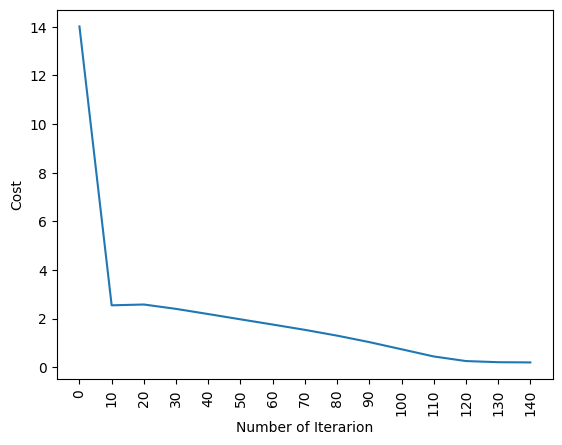

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [30]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

Logistic Regression with Sklearn
In sklearn library, there is a logistic regression method that ease implementing logistic regression.
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
The accuracies are different from what calculated above. Because logistic regression method use a lot of different feature that we do not use like different optimization parameters or regularization.


In [31]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 
